Epoch 1/100
80/80 [==============================] - 5s 24ms/step - loss: 0.7485 - accuracy: 0.6950 - val_loss: 0.6095 - val_accuracy: 0.7000
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 0.6137 - accuracy: 0.6988 - val_loss: 0.5721 - val_accuracy: 0.7100
Epoch 3/100
80/80 [==============================] - 1s 10ms/step - loss: 0.5729 - accuracy: 0.6963 - val_loss: 0.5546 - val_accuracy: 0.7300
Epoch 4/100
80/80 [==============================] - 1s 12ms/step - loss: 0.5473 - accuracy: 0.7025 - val_loss: 0.5384 - val_accuracy: 0.7450
Epoch 5/100
80/80 [==============================] - 1s 16ms/step - loss: 0.5287 - accuracy: 0.7150 - val_loss: 0.5265 - val_accuracy: 0.7450
Epoch 6/100
80/80 [==============================] - 1s 15ms/step - loss: 0.5138 - accuracy: 0.7225 - val_loss: 0.5163 - val_accuracy: 0.7400
Epoch 7/100
80/80 [==============================] - 2s 21ms/step - loss: 0.5001 - accuracy: 0.7375 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 

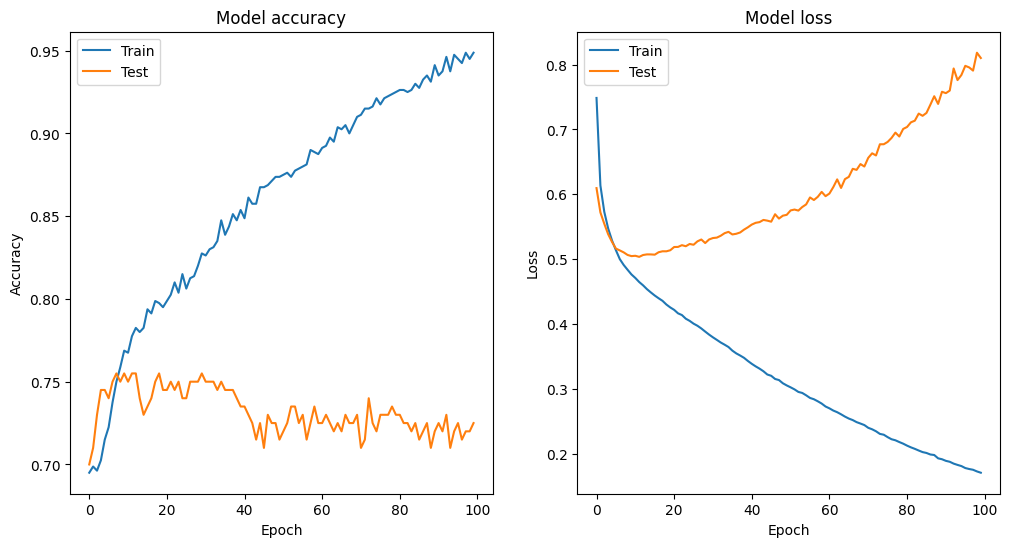

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 1. Veri setini indir ve yükle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Veri setini pandas DataFrame'e yükle
columns = ['Status', 'Month', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings', 'Employment', 'Installment_rate', 'Personal_status', 'Other_parties', 'Residence_since', 'Property_magnitude', 'Age', 'Other_payment_plans', 'Housing', 'Existing_credits', 'Job', 'Num_dependents', 'Own_telephone', 'Foreign_worker', 'Class']
data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Veriyi kaydet
data.to_csv('german_credit_data.csv', index=False)

# 2. Veri seti ile Neural Network Modeli oluştur
# Veri setini yükle
data = pd.read_csv('german_credit_data.csv')

# Özellikleri ve hedef değişkeni ayır
X = data.drop('Class', axis=1)
y = data['Class']

# Kategorik değişkenleri etiketle
for column in X.columns:
    if X[column].dtype == type(object):
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etiketleri kategorik one-hot kodlamaya çevir
y_train = to_categorical(y_train - 1, num_classes=2)  # sınıflar 1 ve 2, bu yüzden 1 çıkarıyoruz
y_test = to_categorical(y_test - 1, num_classes=2)

# Neural network modelini oluştur
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Modeli derle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Modeli değerlendir
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Eğitim ve doğrulama doğruluk değerlerini çiz
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Eğitim ve doğrulama kayıp değerlerini çiz
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()